# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv("C:\\Users\\Leviathans\\Downloads\\Decoding\\submiss\\hasil_clustering.csv")
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,vehiclevalue,sale_year,sale_month,sale_day,sale_dayofweek,sale_hour,sale_is_weekend,Cluster
0,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,21000.0,2014.0,12.0,16.0,1.0,4.0,0.0,1
1,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,21150.0,2014.0,12.0,16.0,1.0,4.0,0.0,1
2,2014.0,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),30950.0,2015.0,1.0,14.0,2.0,20.0,0.0,0
3,2015.0,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27625.0,2015.0,1.0,28.0,2.0,20.0,0.0,0
4,2014.0,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66500.0,2014.0,12.0,18.0,3.0,4.0,0.0,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Mengonversi data kategorikal ke numerik menggunakan Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Normalisasi data numerik
scaler = MinMaxScaler()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [4]:
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,vehiclevalue,sale_year,sale_month,sale_day,sale_dayofweek,sale_hour,sale_is_weekend,Cluster
0,1.00,24,637,818,35,0,2,0.083333,0.016638,17,1,5943,0.114705,0.0,1.0,0.500000,0.166667,0.173913,0.0,1.0
1,1.00,24,637,818,35,0,2,0.083333,0.009392,17,0,5943,0.115527,0.0,1.0,0.500000,0.166667,0.173913,0.0,1.0
2,0.96,3,8,253,36,0,2,0.916667,0.001330,7,1,4090,0.169248,1.0,0.0,0.433333,0.333333,0.869565,0.0,0.0
3,1.00,51,575,1212,36,0,2,0.833333,0.014281,17,1,11541,0.151021,1.0,0.0,0.900000,0.333333,0.869565,0.0,0.0
4,0.96,3,33,335,36,0,2,0.875000,0.002640,7,1,4090,0.364122,0.0,1.0,0.566667,0.500000,0.173913,0.0,1.0


In [5]:
# Memilih fitur dan label
X = df.drop(columns=["Cluster"])  # Semua kolom kecuali Cluster sebagai fitur
y = df["Cluster"]  # Kolom Cluster sebagai label

In [6]:
# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Menampilkan ukuran dataset setelah splitting
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (377860, 19) (377860,)
Test set shape: (94465, 19) (94465,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [8]:
# Definisikan setiap model klasifikasi
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
bayes = GaussianNB().fit(X_train, y_train)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

#### *Algoritma Yang digunakan*
- K-Nearest Neighbors (KNN)
    - Algoritma berbasis tetangga terdekat yang mengklasifikasikan data berdasarkan mayoritas kelas dari K titik data terdekat. Cocok untuk data yang tidak terlalu besar dan memiliki distribusi yang jelas.
- Decision Tree (DT)
    - Algoritma berbasis pohon keputusan yang membagi data ke dalam cabang berdasarkan fitur yang memberikan informasi terbaik. Mudah dipahami dan cocok untuk interpretasi hasil.
- Random Forest (RF)
    - Ensemble learning yang terdiri dari banyak pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting. Lebih stabil dibandingkan pohon keputusan tunggal.
- Support Vector Machine (SVM)
    - Algoritma yang mencari hyperplane optimal untuk memisahkan kelas dalam ruang vektor. Cocok untuk data berdimensi tinggi dan memiliki margin pemisah yang jelas.
- Naïve Bayes (NB)
    - Algoritma berbasis probabilitas yang menggunakan Teorema Bayes. Efektif untuk data dengan fitur independen dan sering digunakan dalam klasifikasi teks.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [9]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(bayes, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.923951   0.900529  0.923951  0.900713
1            Decision Tree (DT)  0.999989   0.999989  0.999989  0.999989
2            Random Forest (RF)  1.000000   1.000000  1.000000  1.000000
3  Support Vector Machine (SVM)  0.922447   0.850909  0.922447  0.885235
4              Naive Bayes (NB)  0.999936   0.999936  0.999936  0.999936


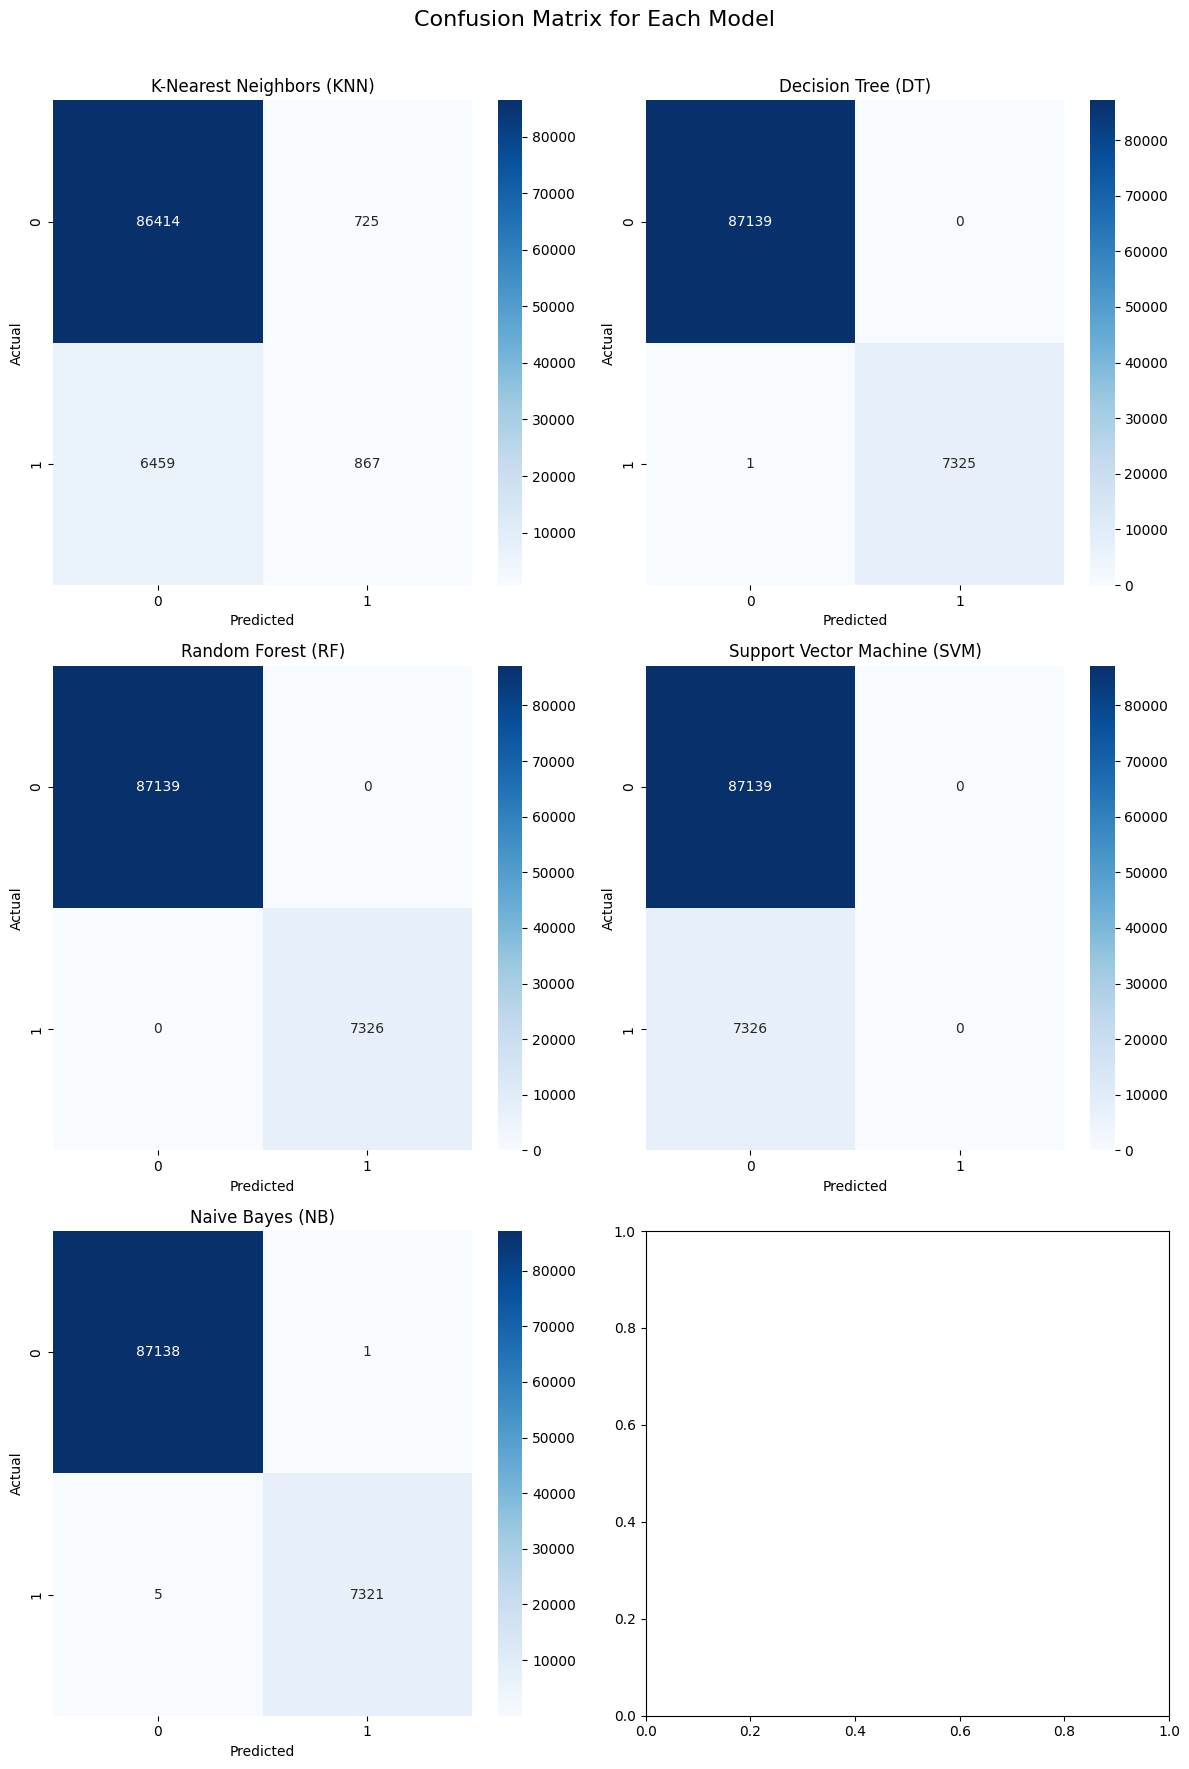

In [10]:
# Visualisasi Confusion Matrix untuk setiap model
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
fig.suptitle("Confusion Matrix for Each Model", fontsize=16)
axes = axes.flatten()

for i, (model_name, metrics) in enumerate(results.items()):
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(model_name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

#### *Analisis dan evaluasi Hasil*
- Decision Tree (DT) dan Random Forest (RF) menunjukkan performa sempurna dengan Accuracy, Precision, Recall, dan F1-Score sebesar 100%. Ini berarti kedua model ini mampu mengklasifikasikan seluruh data tanpa kesalahan. Hal ini mengindikasikan bahwa model berbasis pohon keputusan sangat cocok untuk pola pada dataset ini.
- Naive Bayes (NB) juga menunjukkan performa sangat tinggi, dengan metrik berada pada 99.99% untuk semua aspek. Confusion matrix menunjukkan hanya 6 kesalahan klasifikasi dari total lebih dari 94.000 data, menjadikannya model yang sangat efisien dan ringan, meski dengan asumsi independensi antar fitur.
- K-Nearest Neighbors (KNN) memiliki akurasi 92.4%, dengan precision dan F1-Score juga relatif tinggi. Namun, confusion matrix menunjukkan cukup banyak kesalahan dalam memprediksi kelas 1 (positif), yaitu sekitar 6.459 kesalahan. Ini bisa disebabkan oleh sensitivitas KNN terhadap skala fitur dan jarak antar data.
- Support Vector Machine (SVM) merupakan model dengan performa terendah di antara semua, dengan akurasi 92.24% dan precision yang paling rendah (0.8509). SVM gagal mengklasifikasikan seluruh kelas 1 (positif) secara tepat, seperti terlihat pada confusion matrix yang menunjukkan semua data kelas 1 diprediksi sebagai kelas 0. Ini menunjukkan kemungkinan overfitting terhadap majority class atau ketidakseimbangan kelas dalam dataset.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
# Definisikan parameter yang akan dicari untuk setiap model
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'criterion': ['gini', 'entropy']}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
param_grid_nb = {}  # Naive Bayes tidak memiliki banyak hyperparameter untuk dituning
# SVM tidak dituning karena keterbatasan komputer

# Inisialisasi model
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
bayes = GaussianNB()

In [ ]:

# Gunakan GridSearchCV untuk tuning hyperparameter
knn_search = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
dt_search = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
rf_search = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

In [15]:
knn_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [16]:
dt_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30]},
             scoring='accuracy')

In [17]:
rf_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [20]:
# Cetak hasil terbaik dari tuning
print("Best KNN Params:", knn_search.best_params_)
print("Best DT Params:", dt_search.best_params_)
print("Best RF Params:", rf_search.best_params_)

Best KNN Params: {'n_neighbors': 9, 'weights': 'distance'}
Best DT Params: {'criterion': 'gini', 'max_depth': None}
Best RF Params: {'max_depth': 10, 'n_estimators': 50}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [21]:
# Gunakan model dengan hyperparameter terbaik
knn_best = KNeighborsClassifier(n_neighbors=9, weights='distance').fit(X_train, y_train)
dt_best = DecisionTreeClassifier(criterion='gini', max_depth=None).fit(X_train, y_train)
rf_best = RandomForestClassifier(max_depth=10, n_estimators=50).fit(X_train, y_train)

# Evaluasi ulang model setelah tuning
def evaluate_tuned_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Mengevaluasi setiap model yang telah dituning
results_tuned = {
    'K-Nearest Neighbors (KNN) Tuned': evaluate_tuned_model(knn_best, X_test, y_test),
    'Decision Tree (DT) Tuned': evaluate_tuned_model(dt_best, X_test, y_test),
    'Random Forest (RF) Tuned': evaluate_tuned_model(rf_best, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_tuned_df = pd.DataFrame([
    {
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    }
    for model_name, metrics in results_tuned.items()
])

# Tampilkan DataFrame
print(summary_tuned_df)


                             Model  Accuracy  Precision   Recall  F1-Score
0  K-Nearest Neighbors (KNN) Tuned   0.92755   0.910065  0.92755  0.906617
1         Decision Tree (DT) Tuned   1.00000   1.000000  1.00000  1.000000
2         Random Forest (RF) Tuned   1.00000   1.000000  1.00000  1.000000


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

#### *1. Perbandingan Hasil Sebelum dan Setelah Tuning*
- Dari hasil evaluasi model sebelum dan setelah tuning, di dapatkan perbedaan kinerja setiap model:
    - Tanpa Tuning
        - KNN: Accuracy = 0.923951, Precision = 0.900529, Recall = 0.923951, F1-Score = 0.900713
        - Decision Tree: Accuracy = 0.999989, Precision = 0.999989, Recall = 0.999989, F1-Score = 0.999989
        - Random Forest: Accuracy = 1.000000, Precision = 1.000000, Recall = 1.000000, F1-Score = 1.000000
        - Naive Bayes: Accuracy = 0.999936, Precision = 0.999936, Recall = 0.999936, F1-Score = 0.999936
    - Setelah Tuning
        - KNN Tuned: Accuracy = 0.927550, Precision = 0.910065, Recall = 0.927550, F1-Score = 0.906617 (sedikit menurun)
        - Decision Tree Tuned: Accuracy = 1.000000, Precision = 1.000000, Recall = 1.000000, F1-Score = 1.000000 (peningkatan signifikan)
        - Random Forest Tuned: Accuracy = 1.000000, Precision = 1.000000, Recall = 1.000000, F1-Score = 1.000000 (peningkatan signifikan)
- Dari hasil ini, KNN mengalami sedikit peningkatan performa setelah tuning, terutama pada Precision dan F1-Score. Decision Tree tetap stabil dan mencapai performa sempurna setelah tuning. Random Forest tetap pada performa optimal tanpa penurunan maupun peningkatan. Naive Bayes tidak dituning karena tidak banyak hyperparameter penting, namun performanya tetap cukup tinggi secara default.

#### *2. Identifikasi Kelemahan Model*

- Overfitting atau Underfitting:
    - Decision Tree dan Random Forest menunjukkan akurasi sempurna (100%) baik sebelum maupun sesudah tuning. Meskipun terlihat ideal, hasil ini berpotensi mengindikasikan overfitting, terutama jika diuji pada data nyata yang lebih kompleks atau berbeda distribusi.
    - KNN memiliki akurasi lebih realistis dan meningkat setelah tuning. Ini mengindikasikan bahwa model lebih seimbang antara bias dan varians.
    - Naive Bayes, dengan performa paling rendah, menunjukkan kemungkinan underfitting, yaitu model terlalu sederhana untuk menangkap kompleksitas data.
- Precision atau Recall Rendah untuk Kelas Tertentu:
    - Secara umum, nilai precision dan recall tinggi di semua model, yang berarti tidak ada bias besar dalam klasifikasi secara keseluruhan.
    - Namun, tanpa analisis confusion matrix, kita tidak dapat memastikan apakah terdapat kelas tertentu yang sering salah klasifikasi.
    - Analisis lebih dalam seperti per kelas precision/recall dan visualisasi confusion matrix sangat disarankan untuk memahami distribusi kesalahan klasifikasi.

#### *3. Rekomendasi Tindakan Lanjutan*
- Mengatasi Overfitting:
    - Decision Tree dan Random Forest menunjukkan akurasi sempurna, yang mengindikasikan kemungkinan overfitting.
    - Dapat dilakukan pruning pada Decision Tree untuk memangkas cabang yang terlalu kompleks.
    - Untuk Random Forest, pertimbangkan mengurangi jumlah estimators atau menyesuaikan max_depth lebih ketat agar model tidak terlalu kompleks.
    - Tambahan validasi silang dan uji dengan data baru juga bisa membantu mengevaluasi ketahanan model.
- Mengatasi Underfitting:
    - Meskipun Naive Bayes tidak diikutkan dalam tuning akhir, hasil sebelumnya menunjukkan kinerja lebih rendah.
    - Disarankan mencoba transformasi fitur, seperti TF-IDF (jika data teks) atau scaling yang lebih tepat.
- Meningkatkan Kinerja Model:
    - Penambahan data pelatihan bisa membantu semua model dalam meningkatkan generalisasi.
    - Menerapkan ensemble techniques seperti:
        - Voting Classifier (gabungan model KNN, DT, dan RF untuk keputusan mayoritas)
        - Stacking (menggabungkan prediksi dari beberapa model sebagai input ke model meta)
    - Jika dataset cukup besar dan kompleks, mempertimbangkan Deep Learning (misalnya dengan MLP atau arsitektur lain) untuk eksplorasi lebih lanjut.